# Successful TV-shows

In [4]:
from ATENA_PRO.src.ATENA_A_EDA.benchmark.atena.simulation.dataset import DatasetMeta, SchemaName, NetflixDatasetName, \
    Dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset_meta = DatasetMeta(SchemaName.NETFLIX, NetflixDatasetName.DATASET1)
dataset = Dataset(dataset_meta)
df = dataset.load_data()

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
2,2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
3,3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
4,4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
5,5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Queries

In [6]:
# 2. Filtering the dataset to only include TV shows with more than one season

tv_shows = df[df['type'] == 'TV Show']
tv_shows = tv_shows[tv_shows['duration'].str.contains('Season')]
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)
tv_shows = tv_shows[tv_shows['seasons'] > 1]

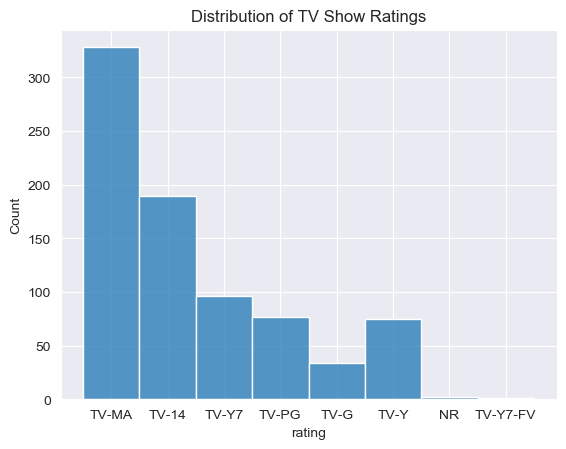

In [7]:
# 3. Exploring the distribution of TV show ratings

sns.histplot(data=tv_shows, x='rating', bins=10)
plt.title('Distribution of TV Show Ratings')
plt.show()

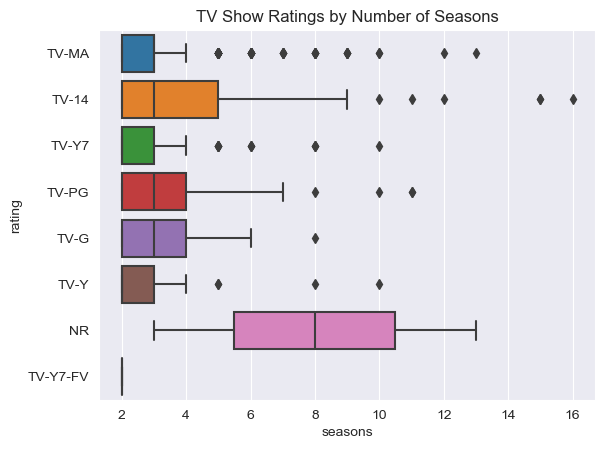

In [8]:
# 4. Investigating the relationship between TV show ratings and the number of seasons

sns.boxplot(data=tv_shows, x='seasons', y='rating')
plt.title('TV Show Ratings by Number of Seasons')
plt.show()

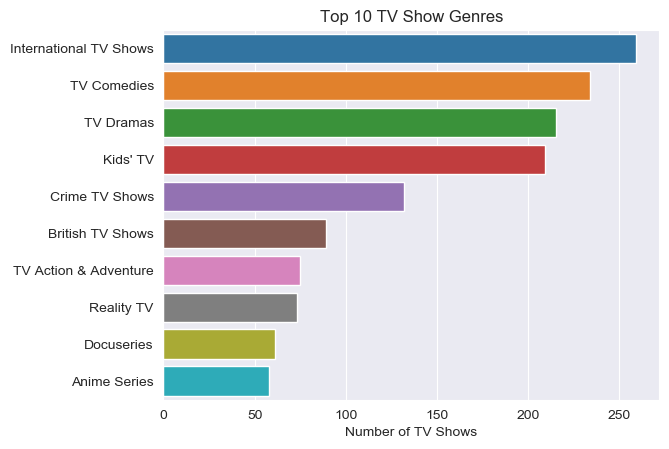

In [9]:
# 5. Examining the most common TV show genres

genres = tv_shows['listed_in'].str.split(', ')
genres = genres.explode().value_counts().head(10)

sns.barplot(x=genres, y=genres.index)
plt.title('Top 10 TV Show Genres')
plt.xlabel('Number of TV Shows')
plt.show()

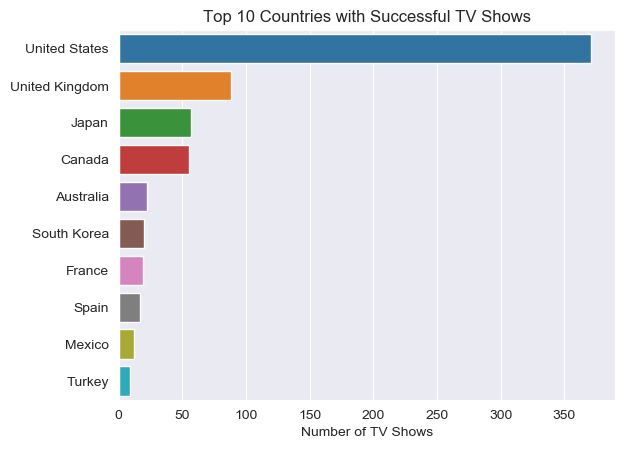

In [12]:
# 6. Analyzing the countries with the most successful TV shows

countries = tv_shows['country'].str.split(', ')
countries = countries.explode().value_counts().head(10)

sns.barplot(x=countries, y=countries.index)
plt.title('Top 10 Countries with Successful TV Shows')
plt.xlabel('Number of TV Shows')
plt.show()

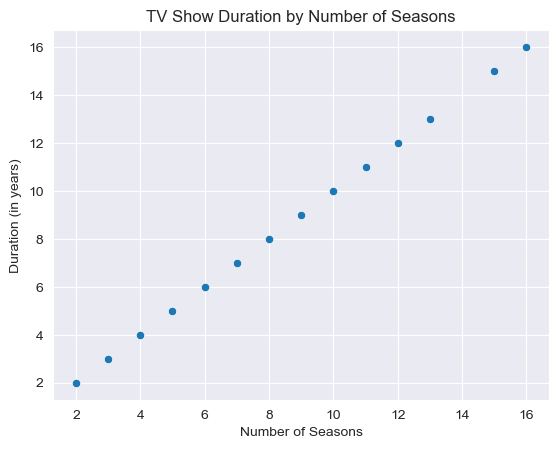

In [13]:
# 7. Investigating the relationship between TV show duration and the number of seasons

tv_shows['duration'] = tv_shows['duration'].str.replace('Seasons', '').str.strip()
tv_shows['duration'] = tv_shows['duration'].astype(int)

sns.scatterplot(data=tv_shows, x='seasons', y='duration')
plt.title('TV Show Duration by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Duration (in years)')
plt.show()